# 1 - Perkenalan

Nama : Sri Wahyuni

Batch : FTDS-016-RMT

Objective : Memprediksi passenger yang Survive atau Not Survive

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 3 - Data Loading

In [2]:
# Data Loading

data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 4 - Data Preprocessing

## Get Data for Model Inference

In [3]:
# Get Data for Model Inference

data_inf = data.sample(5, random_state=28)
data_inf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [4]:
# Remove Inference Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
1,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
2,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
3,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C
4,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


## Splitting between `X` and `y`

In [6]:
# Splitting between `X` and `y`

X = data_train_test.drop('Survived', axis=1)
y = data_train_test['Survived']

In [7]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=28)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (640, 11)
Val Size :  (113, 11)
Test Size :  (133, 11)


## Handling Missing Values

In [8]:
# Check Missing Values on X_train

X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            126
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          496
Embarked         1
dtype: int64

In [9]:
# Check Missing Values on X_val

X_val.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            26
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          86
Embarked        0
dtype: int64

In [10]:
# Check Missing Values on X_test

X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             25
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          102
Embarked         1
dtype: int64

## Feature Selection

In [11]:
# Display X_train

X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
786,792,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
189,191,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
567,572,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
500,505,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
868,874,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
163,165,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
522,527,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
34,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
566,571,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S


Misalkan column `PassengerId`, `Cabin`, `Ticket`, `Embarked`, dan `Name` tidak memiliki korelasi yang kuat terhadap column `Survived`.

In [12]:
# Drop Columns

X_train.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_val.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)

## Get Numerical Columns and Categorical Columns

In [13]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns :  ['Sex']


## Pipeline

In [14]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [15]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(640, 7)

# 5 - Sequential API

## 5.1 - Model Definition

In [16]:
# Create Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sequential = Sequential()
model_sequential.add(Dense(16, activation='relu', input_shape=(7,))) # Hidden Layer 1
model_sequential.add(Dense(8, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Plot Layers

import tensorflow as tf

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## 5.2 - Model Training

In [18]:
# Train the Model

%time
history_seq = model_sequential.fit(X_train,
                                   y_train,
                                   epochs=20,
                                   validation_data=(X_val, y_val),
                                   batch_size=10)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/20
64/64 [==============================] - 1s 6ms/step - loss: 0.6596 - accuracy: 0.6297 - val_loss: 0.5829 - val_accuracy: 0.7345
Epoch 2/20
64/64 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7266 - val_loss: 0.5352 - val_accuracy: 0.7876
Epoch 3/20
64/64 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7531 - val_loss: 0.5172 - val_accuracy: 0.7699
Epoch 4/20
64/64 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7812 - val_loss: 0.5103 - val_accuracy: 0.7611
Epoch 5/20
64/64 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7953 - val_loss: 0.5111 - val_accuracy: 0.7345
Epoch 6/20
64/64 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.8031 - val_loss: 0.5135 - val_accuracy: 0.7345
Epoch 7/20
64/64 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8094 - val_loss: 0.5161 - va

## 5.3 - Model Evaluation

In [19]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.659626,0.629687,0.582891,0.734513
1,0.575766,0.726562,0.535174,0.787611
2,0.528512,0.753125,0.517204,0.769912
3,0.498910,0.781250,0.510312,0.761062
4,0.477231,0.795313,0.511098,0.734513
5,0.463448,0.803125,0.513516,0.734513
6,0.454717,0.809375,0.516127,0.734513
7,0.448389,0.810938,0.513304,0.734513
8,0.443033,0.814062,0.509286,0.734513
9,0.437673,0.814062,0.508899,0.734513


<Axes: >

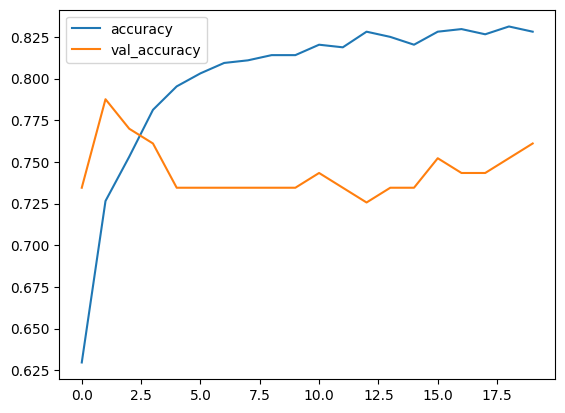

In [20]:
# Plot between accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

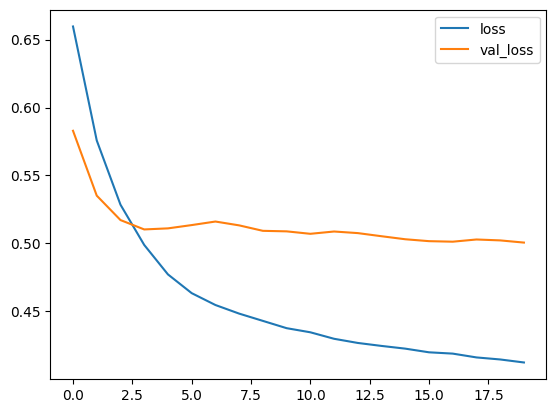

In [21]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [22]:
# Model Evaluation

from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        84
           1       0.75      0.78      0.76        49

    accuracy                           0.82       133
   macro avg       0.81      0.81      0.81       133
weighted avg       0.82      0.82      0.82       133



# 6 - Functional API

## 6.1 - Model Definition

In [23]:
# Create Functional Model

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(7,))
hidden1_layer = Dense(16, activation='relu')(input_layer)
hidden2_layer = Dense(8, activation='relu')(hidden1_layer)

concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 16)                   128       ['input_1[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 8)                    136       ['dense_3[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 15)                   0         ['input_1[0][0]',             
                                                                     'dense_4[0][0]']         

In [24]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## 6.2 - Model Training

In [25]:
# Train the Model

%time
history_func = model_functional.fit(X_train,
                                   y_train,
                                   epochs=20,
                                   validation_data=(X_val, y_val),
                                   batch_size=10)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/20
64/64 [==============================] - 1s 5ms/step - loss: 0.6165 - accuracy: 0.6812 - val_loss: 0.5421 - val_accuracy: 0.7522
Epoch 2/20
64/64 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7375 - val_loss: 0.5180 - val_accuracy: 0.8053
Epoch 3/20
64/64 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.7563 - val_loss: 0.5047 - val_accuracy: 0.7965
Epoch 4/20
64/64 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7703 - val_loss: 0.4974 - val_accuracy: 0.8053
Epoch 5/20
64/64 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7844 - val_loss: 0.4940 - val_accuracy: 0.7876
Epoch 6/20
64/64 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7984 - val_loss: 0.4941 - val_accuracy: 0.7788
Epoch 7/20
64/64 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.8234 - val_loss: 0.4912 - va

## 6.3 - Model Evaluation

In [26]:
# Create DataFrame

history_functional_df = pd.DataFrame(history_func.history)
history_functional_df

,loss,accuracy,val_loss,val_accuracy
0,0.616526,0.681250,0.542111,0.752212
1,0.572953,0.737500,0.517983,0.805310
2,0.540087,0.756250,0.504682,0.796460
3,0.511934,0.770312,0.497405,0.805310
4,0.489368,0.784375,0.494026,0.787611
5,0.471548,0.798437,0.494087,0.778761
6,0.457081,0.823438,0.491180,0.796460
7,0.446858,0.831250,0.490962,0.778761
8,0.437692,0.832812,0.493581,0.752212
9,0.430773,0.829687,0.493009,0.752212


<Axes: >

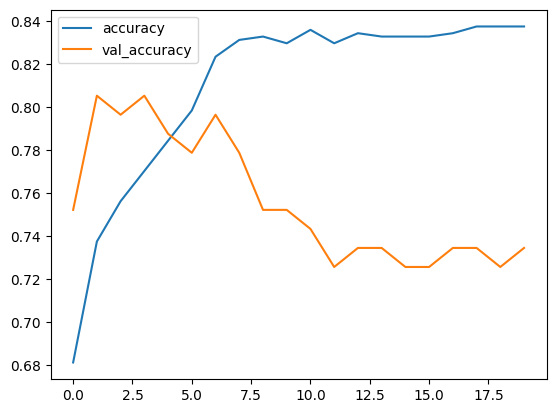

In [27]:
# Plot between accuracy and val_accuracy

history_functional_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

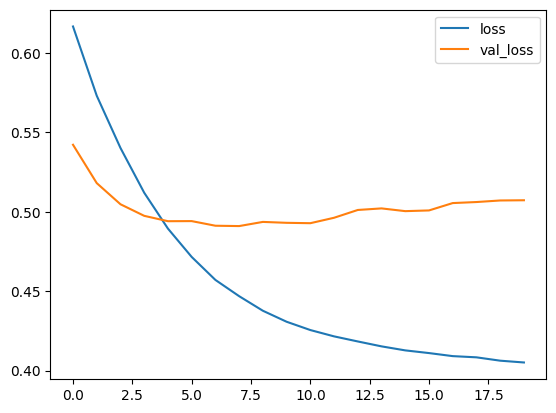

In [28]:
# Plot between loss and val_loss

history_functional_df[['loss', 'val_loss']].plot()

In [29]:
# Model Evaluation

from sklearn.metrics import classification_report

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        84
           1       0.81      0.78      0.79        49

    accuracy                           0.85       133
   macro avg       0.84      0.83      0.84       133
weighted avg       0.85      0.85      0.85       133



# 7 - Model Saving

In [30]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

In [31]:
# Summary of Model Sequential

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Freeze Model

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 273 (1.07 KB)
_________________________________________________________________


In [33]:
# Save ANN Model

model_sequential.save('titanic_model.h5')

C:\Users\wSatrian\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 8 - Model Inference

In [34]:
# Load The Models

with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = joblib.load(file_1)

from tensorflow.keras.models import load_model
model_ann = load_model('titanic_model.h5')

In [35]:
# Transform Inference-Set

data_inf_transform = model_pipeline.transform(data_inf)
data_inf_transform

array([[ 0.85858734, -0.59345635, -0.48794103, -0.49246397, -0.4728609 ,
         0.        ,  1.        ],
       [-1.54620871,  0.88962837,  0.44984353, -0.49246397,  0.35585768,
         0.        ,  1.        ],
       [ 0.85858734, -0.59345635, -0.48794103, -0.49246397, -0.47471659,
         0.        ,  1.        ],
       [-1.54620871,  0.51885719, -0.48794103,  0.72443541, -0.06824395,
         0.        ,  1.        ],
       [-1.54620871,  1.5570165 , -0.48794103,  0.72443541,  0.51962175,
         0.        ,  1.        ]])

In [36]:
# Predict using Neural Network

y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 86ms/step


array([[0],
       [0],
       [0],
       [0],
       [0]])

In [37]:
import sklearn
print(sklearn.__version__)
print(joblib.__version__)

1.3.0
1.3.1


In [38]:
# !pip install --upgrade tensorflow==2.4.1
# !pip install --upgrade scikit-learn==1.1.3
# !pip install --upgrade joblib==1.1.1